<h2> Importando librarys necessárias </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<h3>Printando as primeiras linhas do dataframe</h3>

In [2]:
dataframe = pd.read_csv('Datasets/kc_house_data.csv')
dataframe.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



<h2> Features </h2>


<h3> Listando e entendendo as features </h3>

In [3]:
dataframe.columns #listando para conhecer o que deve ou não ser inserido em um datafrase final

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [4]:
##########
# Dataframe Metadata (para entender melhor o que está sendo predito e o que é importante)
# id - id unico da casa
# date - data que a casa foi vendida
# price - preço da casa quando vendida
# bedrooms - número de quartos
# bathrooms - número de banheiros
# sqft_living - tamanho da área útil
# sqft_lot - tamanho do terreno
# floors - total de andares da casa
# waterfront - se a casa tem vista para o mar
# view - se esta casa ja foi visitada por clientes
# condition - uma nota da condição de preservação da casa
# grade - uma nota da casa no geral baseado no sistema de pontuação da cidade
# sqft_above - o tamanho da casa sem contar porão
# sqft_basement - o tamanho do porão
# yr_built - o ano que a casa foi construída
# yr_renovated - o ano que a casa passou por renovação ou melhorias
# zipcode - o CEP da casa
# lat - a latitude da casa
# long - a longitude da casa
# sqft_living15 - o tamanho da área útil da casa em 2015 (pós renovações)
# sqft_lot15 - o tamanho do terreno da casa em 2015 (pós renovações)
#########

<h3> Removendo as colunas não necessarias </h3>

In [5]:
#removendo id, view, zipcode, lat e long por não serem colunas relevantes ou tão relevantes
houses_df = dataframe.drop(['id', 'view', 'zipcode', 'lat', 'long'], axis=1) 
#printando o novo dataframe
houses_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503


<h3> Pegando apenas o ano do `date` e transformando o `yr_renovated` para binario </h3>

In [6]:
houses_df['month'] = houses_df['date'].map(lambda x: x[4:6]) # setando uma nova coluna apenas com o ano
houses_df['year'] = houses_df['date'].map(lambda x: x[0:4]) # setando uma nova coluna apenas com o ano
houses_df = houses_df.drop(columns='date') # dropando date
houses_df['yr_built'] = np.where(houses_df['yr_renovated'] > 0, houses_df['yr_renovated'], houses_df['yr_built']) # transformando yr_renovated para sim ou não
houses_df = houses_df.drop(columns='yr_renovated')
houses_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1991,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,2720,8062,02,2015
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,1800,7503,02,2015


<h3> Printando o dataframe após modelado </h3>

In [7]:
houses_df.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1991,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,2720,8062,02,2015
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,1800,7503,02,2015


<h2> Normalizando os dados </h2>

In [8]:
from sklearn.preprocessing import MinMaxScaler
# condicional para remover casas que seram testadas posteriormente
is_may_2015 = (houses_df['month'] == '05') & (houses_df['year'] == '2015') 

# criando novo dataframe com casas de maio de 2015 e retirando elas do dataframe principal
houses_df_MAY15 = houses_df[is_may_2015]
houses_df = houses_df.drop(index=houses_df_MAY15.index)

aux_scaler = MinMaxScaler().fit_transform(houses_df.values[:,:-1]) # normalizando os dados
houses_df_norm = pd.DataFrame(data=aux_scaler, columns=houses_df.columns[:-1]) #criando um dataframe com os dados normalizados

#separando preços e retirando eles do dataset
houses_df_norm_price = houses_df_norm
houses_df_norm = houses_df_norm.drop(columns='price')

houses_df_norm.head()


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,month
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.153043,0.005742,0.818182
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.5,0.500000,0.206140,0.082988,0.791304,0.213913,0.008027,1.000000
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.393043,0.008513,0.090909
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.156522,0.004996,1.000000
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.233043,0.007871,0.090909


In [9]:
# fazendo a mesma coisa para o dataframe de maio de 2015
aux_scaler2 = MinMaxScaler().fit_transform(houses_df_MAY15.values[:,:-1]) # normalizando os dados
houses_df_norm_MAY15 = pd.DataFrame(data=aux_scaler2, columns=houses_df_MAY15.columns[:-1]) #criando um dataframe com os dados normalizados
# seguindo normal = value - min / max - min, normalizando a coluna month
houses_df_norm_MAY15['month'] = float((5 - 1)) / (12 - 1);

houses_df_norm_MAY15_price = houses_df_norm_MAY15
houses_df_norm_MAY15 = houses_df_norm_MAY15.drop(columns='price')
houses_df_norm_MAY15.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,month
0,0.500000,0.047619,0.173050,0.001962,0.25,0.0,0.75,0.375,0.236434,0.000000,0.217391,0.251193,0.010255,0.363636
1,0.333333,0.047619,0.173050,0.006770,0.00,0.0,0.75,0.375,0.120155,0.270270,0.539130,0.251193,0.024434,0.363636
2,0.500000,0.476190,0.660993,0.016667,0.25,0.0,0.50,0.875,0.844961,0.135135,0.939130,0.724124,0.060297,0.363636
3,0.166667,0.047619,0.092199,0.005876,0.00,0.0,0.75,0.375,0.125969,0.000000,0.339130,0.215930,0.021157,0.363636
4,0.500000,0.333333,0.258156,0.041815,0.00,0.0,0.50,0.500,0.352713,0.000000,0.843478,0.471064,0.151899,0.363636


<h2>Separando treino e teste</h2>

In [10]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(houses_df_norm, houses_df_norm_price.price, test_size=0.3, random_state=2)

train_XM, test_XM, train_ym, test_ym = train_test_split(houses_df_norm_MAY15, houses_df_norm_MAY15_price.price, test_size=0.99, random_state=2)

<h2> F-test </h2>

In [11]:
from sklearn.feature_selection import *
F, pval = f_classif(train_X, train_y)

drop_columns = np.argwhere(pval >= 0.5)
drop_columns = drop_columns.reshape(-1).tolist()
drop_columns = train_X.columns[drop_columns].tolist()

train_X = train_X.drop(axis=1, columns=drop_columns)
train_y = train_y.drop(axis=1, columns=drop_columns)
test_X = test_X.drop(axis=1, columns=drop_columns)
test_y = test_y.drop(axis=1, columns=drop_columns)
train_XM = train_XM.drop(axis=1, columns=drop_columns)
train_ym = test_ym.drop(axis=1, columns=drop_columns)
test_XM = test_XM.drop(axis=1, columns=drop_columns)
test_ym = test_ym.drop(axis=1, columns=drop_columns)

<h2> Funções úteis </h2>

In [12]:
# função para mostrar predicões em cima de um modelo de predição

def evaluate(model):
    predicted_dataframe = pd.DataFrame( { "Certo": test_y, "Predito" : model.predict( test_X ) } )
    predicted_dataframe['Residual_error'] = predicted_dataframe.Certo - predicted_dataframe.Predito
    return predicted_dataframe

def evaluate_MAY2015(model):
    predicted_dataframe = pd.DataFrame( { "Certo": test_ym, "Predito" : model.predict( test_XM ) } )
    predicted_dataframe['Residual_error'] = predicted_dataframe.Certo - predicted_dataframe.Predito
    return predicted_dataframe

# função para metricas MAE (Mean Average Error ) e RMSE (Root Mean Square Error )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def print_metrics(predicted_dataframe):
    rmse = mean_squared_error(predicted_dataframe.Certo, predicted_dataframe.Predito)
    mae = mean_absolute_error(predicted_dataframe.Certo, predicted_dataframe.Predito)
    print("RMSE: ", rmse, " : ", "MAE: ", mae)


<h2> Linear Regression </h2>

In [13]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train_X, train_y)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
linear_reg_df = evaluate(linear_reg)
linear_reg_df.head()

,Certo,Predito,Residual_error
1446,0.020321,0.033260,-0.012938
12088,0.239344,0.189338,0.050006
15633,0.193443,0.132355,0.061087
799,0.030944,0.049479,-0.018535
18695,0.121311,0.156964,-0.035652


In [15]:
print_metrics(linear_reg_df)

('RMSE: ', 0.0007940368399014914, ' : ', 'MAE: ', 0.01885154587956188)


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


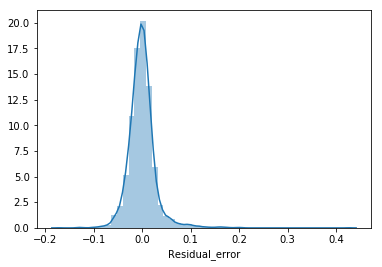

In [16]:
sn.distplot( linear_reg_df.Residual_error )

In [17]:
linear_reg_df_may = evaluate_MAY2015(linear_reg)
linear_reg_df_may.head()

,Certo,Predito,Residual_error
37,0.511792,2.467559e+10,-2.467559e+10
413,0.060053,-1.059018e+10,1.059018e+10
198,0.056528,-2.106648e+10,2.106648e+10
497,0.068563,1.491241e+10,-1.491241e+10
246,0.144055,-7.401737e+09,7.401737e+09


In [18]:
print_metrics(linear_reg_df_may)

('RMSE: ', 2.9019624015080866e+20, ' : ', 'MAE: ', 14165849783.886585)


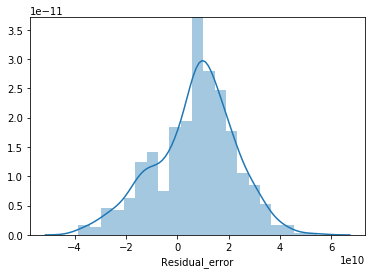

In [19]:
sn.distplot( linear_reg_df_may.Residual_error )

<h2> DecisionTree </h2>

In [27]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(max_features=train_X.shape[1])
dec_tree.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=11,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
dec_tree_df = evaluate(dec_tree)
dec_tree_df.head()

,Certo,Predito,Residual_error
1446,0.020321,0.033736,-0.013415
12088,0.239344,0.042492,0.196852
15633,0.193443,0.068852,0.124590
799,0.030944,0.038098,-0.007154
18695,0.121311,0.142295,-0.020984


In [29]:
print_metrics(dec_tree_df)

('RMSE: ', 0.0012104239953675787, ' : ', 'MAE: ', 0.022217940473553598)


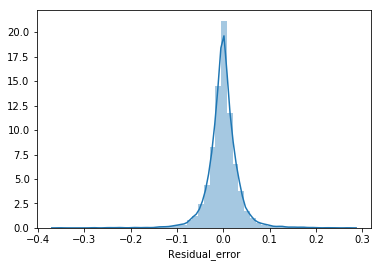

In [30]:
sn.distplot( dec_tree_df.Residual_error )

In [31]:
dec_tree_df_may = evaluate_MAY2015(dec_tree)
dec_tree_df_may.head()

,Certo,Predito,Residual_error
37,0.511792,0.602361,-0.090569
413,0.060053,0.068197,-0.008143
198,0.056528,0.067148,-0.010619
497,0.068563,0.047869,0.020694
246,0.144055,0.016393,0.127662


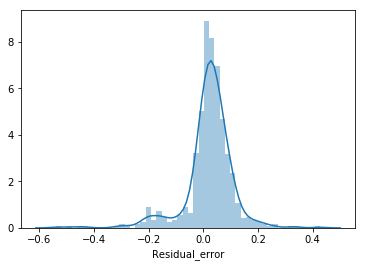

In [32]:
sn.distplot( dec_tree_df_may.Residual_error )

In [33]:
print_metrics(dec_tree_df_may)

('RMSE: ', 0.008462899535168872, ' : ', 'MAE: ', 0.06237401084971981)


<h2> MLPRegressor </h2>

In [34]:
from sklearn.neural_network import MLPRegressor

MLP_1 = MLPRegressor(hidden_layer_sizes=(7), max_iter=1000)
MLP_1.fit(train_X, train_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=7, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
mlp_1_df = evaluate(MLP_1)
mlp_1_df.head()

,Certo,Predito,Residual_error
1446,0.020321,0.031435,-0.011113
12088,0.239344,0.147521,0.091824
15633,0.193443,0.088302,0.105140
799,0.030944,0.045656,-0.014711
18695,0.121311,0.155710,-0.034398


In [36]:
print_metrics(mlp_1_df)

('RMSE: ', 0.0014754751890297209, ' : ', 'MAE: ', 0.026011552203405036)


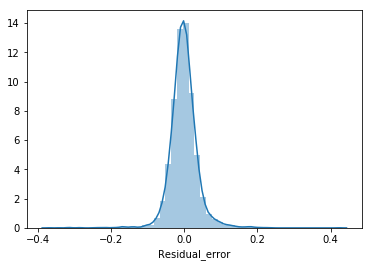

In [37]:
sn.distplot( mlp_1_df.Residual_error )

In [38]:
mlp_1_df_may = evaluate_MAY2015(MLP_1)
mlp_1_df_may.head()

,Certo,Predito,Residual_error
37,0.511792,0.392749,0.119043
413,0.060053,-0.022414,0.082468
198,0.056528,-0.105922,0.162450
497,0.068563,-0.104635,0.173198
246,0.144055,-0.044381,0.188437


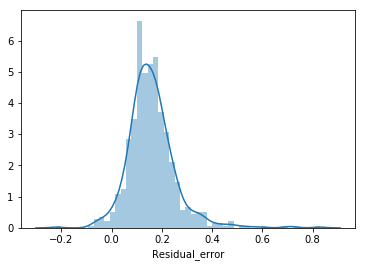

In [39]:
sn.distplot( mlp_1_df_may.Residual_error )

In [40]:
print_metrics(mlp_1_df_may)

('RMSE: ', 0.034866988727702816, ' : ', 'MAE: ', 0.16175909378986927)
